sources:
http://www.cs.otago.ac.nz/cosc453/student_tutorials/principal_components.pdf
http://sebastianraschka.com/Articles/2014_pca_step_by_step.html#sort_eig
http://dai.fmph.uniba.sk/courses/ml/sl/PCA.pdf ## the most comprehensive ##

In [1]:
'Libraries...'
%pylab
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


Using matplotlib backend: MacOSX
Populating the interactive namespace from numpy and matplotlib


1.) Generate the data to test with.


x    y
2.5  2.4
0.5  0.7
2.2  2.9
1.9  2.2
3.1  3.0
2.3  2.7
2    1.6
1    1.1
1.5  1.6
1.1  0.9

In [2]:
data = np.array([[2.5,0.5,2.2,1.9,3.1,2.3,2,1,1.5,1.1],[2.4,0.7,2.9,2.2,3.0,2.7,1.6,1.1,1.6,0.9]])
print data

[[ 2.5  0.5  2.2  1.9  3.1  2.3  2.   1.   1.5  1.1]
 [ 2.4  0.7  2.9  2.2  3.   2.7  1.6  1.1  1.6  0.9]]


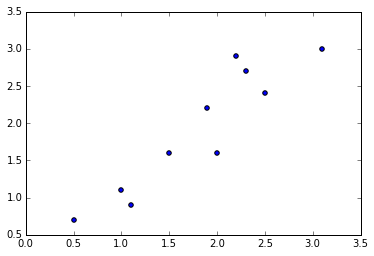

In [3]:
plt.scatter(data[0],data[1])

2.) find the mean of the x and y coordinates.

In [4]:
mean_x = np.mean(data[0])
mean_y = np.mean(data[1])

#print mean_x, mean_y

mean_data = np.array([[mean_x], [mean_y]])

print 'The mean x-coordinate:',mean_x
print 'The mean y-coordinate:',mean_y

The mean x-coordinate: 1.81
The mean y-coordinate: 1.91


###### 3.) subtract the mean x and y from the original matrix.

In [5]:
data_mod = data - mean_data
print data_mod

[[ 0.69 -1.31  0.39  0.09  1.29  0.49  0.19 -0.81 -0.31 -0.71]
 [ 0.49 -1.21  0.99  0.29  1.09  0.79 -0.31 -0.81 -0.31 -1.01]]


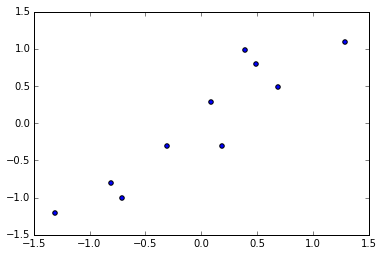

In [6]:
plt.scatter(data_mod[0],data_mod[1])

4.) Calculate the covariance matrix.

In [7]:
data_covmat = np.cov(data_mod)
print 'The following is the covariance matrix:''\n',data_covmat

The following is the covariance matrix:
[[ 0.61655556  0.61544444]
 [ 0.61544444  0.71655556]]


5.) Calculate the eigenvalues and eigenvectors

In [8]:
eig_val_covmat, eig_vec_covmat = np.linalg.eig(data_covmat)
print 'The Eigenvalues are:''\n',eig_val_covmat
print 'The Eigenvectors are:''\n',eig_vec_covmat

The Eigenvalues are:
[ 0.0490834   1.28402771]
The Eigenvectors are:
[[-0.73517866 -0.6778734 ]
 [ 0.6778734  -0.73517866]]


6.) Determine the feature vector:
    The feature vector(s) will be determined by ordering the eigenvectors by the eigenvectors corresponding to the largest    eigenvalues.

In [9]:
eig_vals_sorted = np.sort(eig_val_covmat)[::-1]
eig_vecs_sorted = eig_vec_covmat[eig_val_covmat.argsort()[::-1]]
print 'The eigenvalues sorted greatest to least:''\n',eig_vals_sorted
print 'The eigenvectors sorted greatest to least:''\n',eig_vecs_sorted

The eigenvalues sorted greatest to least:
[ 1.28402771  0.0490834 ]
The eigenvectors sorted greatest to least:
[[ 0.6778734  -0.73517866]
 [-0.73517866 -0.6778734 ]]


-- below this point gets a little tricky. In general, explainations go from very detailed to fuzzy beyond this point.

In [10]:
print data_mod.T
print eig_vecs_sorted[0].T

[[ 0.69  0.49]
 [-1.31 -1.21]
 [ 0.39  0.99]
 [ 0.09  0.29]
 [ 1.29  1.09]
 [ 0.49  0.79]
 [ 0.19 -0.31]
 [-0.81 -0.81]
 [-0.31 -0.31]
 [-0.71 -1.01]]
[ 0.6778734  -0.73517866]


In [11]:
final = np.dot(eig_vecs_sorted[0].T,data_mod)
print final

[ 0.1074951   0.00155202 -0.46345624 -0.1521932   0.07311195 -0.24863317
  0.35670133  0.04641726  0.01776463  0.26124033]


In [12]:
final_fin = final + mean_data
print final_fin

[[ 1.9174951   1.81155202  1.34654376  1.6578068   1.88311195  1.56136683
   2.16670133  1.85641726  1.82776463  2.07124033]
 [ 2.0174951   1.91155202  1.44654376  1.7578068   1.98311195  1.66136683
   2.26670133  1.95641726  1.92776463  2.17124033]]


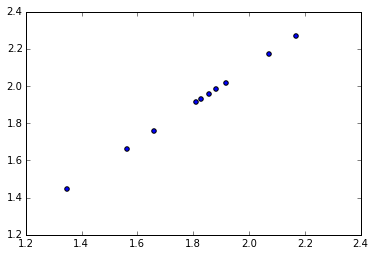

In [13]:
plt.scatter(final_fin[0],final_fin[1])